In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

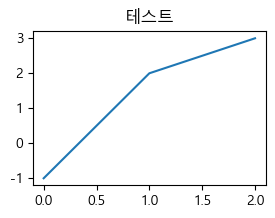

In [2]:
# ----------------------
# 그래프 전역 설정
# ----------------------
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
plt.rc('figure', figsize=(10,4))
pd.Series([-1,2,3]).plot(title='테스트', figsize=(3,2))
pass

## 데이터 수집 및 전처리
* 행정안전부<br>
https://www.mois.go.kr/<br>
정책자료 > 주민등록인구통계<br>
전체읍면동 현황<br><br>
* 바로가기<br>
https://jumin.mois.go.kr/index.jsp

#### 데이터프레임 생성

In [ ]:
# ------------------------
# 데이터프레임 생성
#   - df_all
#   - 천단위 구분자 처리 : thousands
# ------------------------

df = pd.read_csv("C:\\Users\\User\\Documents\\VSCode\\Data School\\data school\\00.data\\인구구조\\202503_202503_주민등록인구및세대현황_월간.csv")

# 쉼표 제거 + 숫자형 변환 (int or float 자동 처리)
for col in df.columns:
    if df[col].dtype == 'object':  # 문자열인 경우
        # 쉼표 포함된 경우만 처리
        if df[col].str.contains(',').any():
            df[col] = df[col].str.replace(',', '', regex=False)

            # 정수형으로 변환 시도, 실패 시 실수형으로
            try:
                df[col] = df[col].astype(int)
            except ValueError:
                df[col] = df[col].astype(float)

In [83]:
df.head()

,행정구역,2025년03월_총인구수,2025년03월_세대수,2025년03월_세대당 인구,2025년03월_남자 인구수,2025년03월_여자 인구수,2025년03월_남여 비율
0,서울특별시 (1100000000),9335734,4497896,2.08,4504618,4831116,0.93
1,서울특별시 종로구 (1111000000),138184,72387,1.91,66450,71734,0.93
2,서울특별시 종로구 청운효자동(1111051500),10986,4915,2.24,5007,5979,0.84
3,서울특별시 종로구 사직동(1111053000),8937,4562,1.96,3940,4997,0.79
4,서울특별시 종로구 삼청동(1111054000),2189,1094,2.00,1049,1140,0.92


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3913 entries, 0 to 3912
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   행정구역             3913 non-null   object 
 1   2025년03월_총인구수    3913 non-null   int64  
 2   2025년03월_세대수     3913 non-null   int64  
 3   2025년03월_세대당 인구  3913 non-null   float64
 4   2025년03월_남자 인구수  3913 non-null   int64  
 5   2025년03월_여자 인구수  3913 non-null   int64  
 6   2025년03월_남여 비율   3913 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 214.1+ KB


#### 컬럼명 변경

In [85]:
# ------------------------
# ['행정구역','총인구수','세대수','세대당 인구','남자 인구수','여자 인구수','남여 비율']
# ------------------------

df = df.iloc[:, [0, 1, 2, 3, 4, 5, 6]]
df.columns = ['행정구역', '총인구수', '세대수', '세대당 인구', '남자 인구수', '여자 인구수', '남여 비율']

# 결과 확인
df

,행정구역,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
0,서울특별시 (1100000000),9335734,4497896,2.08,4504618,4831116,0.93
1,서울특별시 종로구 (1111000000),138184,72387,1.91,66450,71734,0.93
2,서울특별시 종로구 청운효자동(1111051500),10986,4915,2.24,5007,5979,0.84
3,서울특별시 종로구 사직동(1111053000),8937,4562,1.96,3940,4997,0.79
4,서울특별시 종로구 삼청동(1111054000),2189,1094,2.00,1049,1140,0.92
...,...,...,...,...,...,...,...
3908,제주특별자치도 서귀포시 서홍동(5013058000),11088,4625,2.40,5473,5615,0.97
3909,제주특별자치도 서귀포시 대륜동(5013059000),15038,6935,2.17,7602,7436,1.02
3910,제주특별자치도 서귀포시 대천동(5013060000),13672,6556,2.09,6953,6719,1.03
3911,제주특별자치도 서귀포시 중문동(5013061000),12122,6005,2.02,6119,6003,1.02


#### 파생컬럼 추가
* 행정구역별
    * 행정구역 컬럼에서 행정구역명만 분리
* str 접근자
    * 시리즈나 컬럼에 문자열 메소드를 적용할 때 사용
        * 예) `컬럼.str.replace(' ', '')`    
    * 시리즈나 컬럼의 문자열 인덱스/슬라이스를 할 때 사용
        * 예) `컬럼.str[3:]`

In [86]:
# ------------------------
# 행정구역명 컬럼 추가
# ------------------------

df['행정구역명'] = df['행정구역'].str.split(' ').str[0]

## 행정구역별 인구구조 분석
#### 데이터 준비
* 행정구역 레벨의 데이터 조건
    * 행정구역코드가 '00000000'(8자리)로 끝남

In [87]:
# ------------------------
# 행정구역 단위 데이터만 선택
#   - df_region1
#   - 행정구역 코드가 00000000로 끝나는 데이터 선택
# ------------------------

# 괄호 안에서 코드만 추출
df['행정구역코드'] = df['행정구역'].str.extract(r'\((\d+)\)')

# 8자리 '00000000'으로 끝나는 행만 필터링
df_region1 = df[df['행정구역코드'].str.endswith('00000000')]

#### 행정구역별 총 인구수 시각화
* 인구수가 많은 행정구역부터 내림차순 정렬
* 정렬된 데이터로 시각화

In [88]:
# -----------------------------------------
# 총 인구수 많은 순으로 정렬
# -----------------------------------------

# 내림차순 정렬
df_region1_sorted = df_region1.sort_values(by='총인구수', ascending=False)

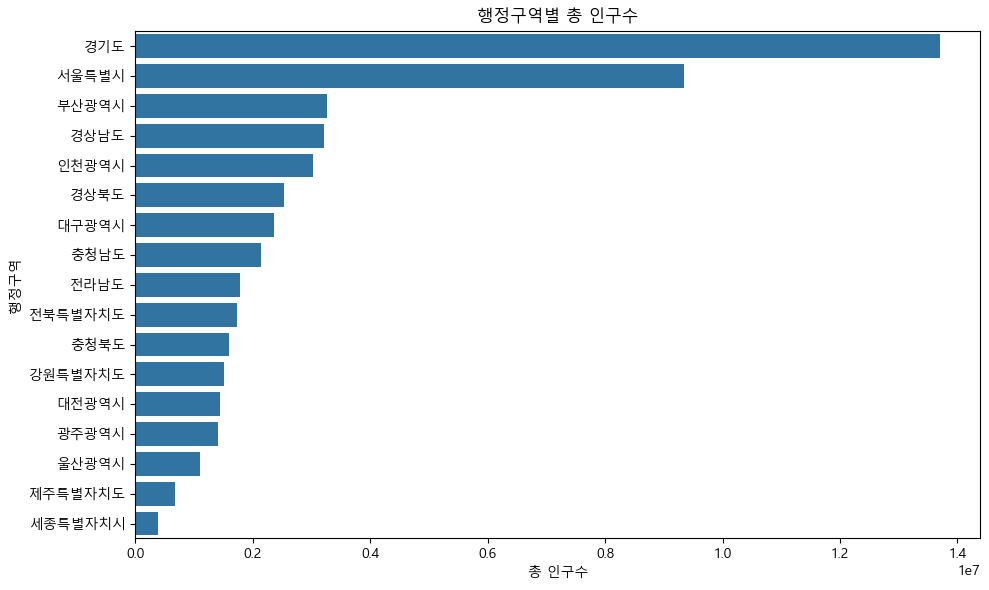

In [89]:
# ------------------------
# matplotlib으로 시각화
# ------------------------

plt.figure(figsize=(10, 6))
sns.barplot(data=df_region1_sorted, x='총인구수', y='행정구역명')
plt.title('행정구역별 총 인구수')
plt.xlabel('총 인구수')
plt.ylabel('행정구역')
plt.tight_layout()
plt.show()

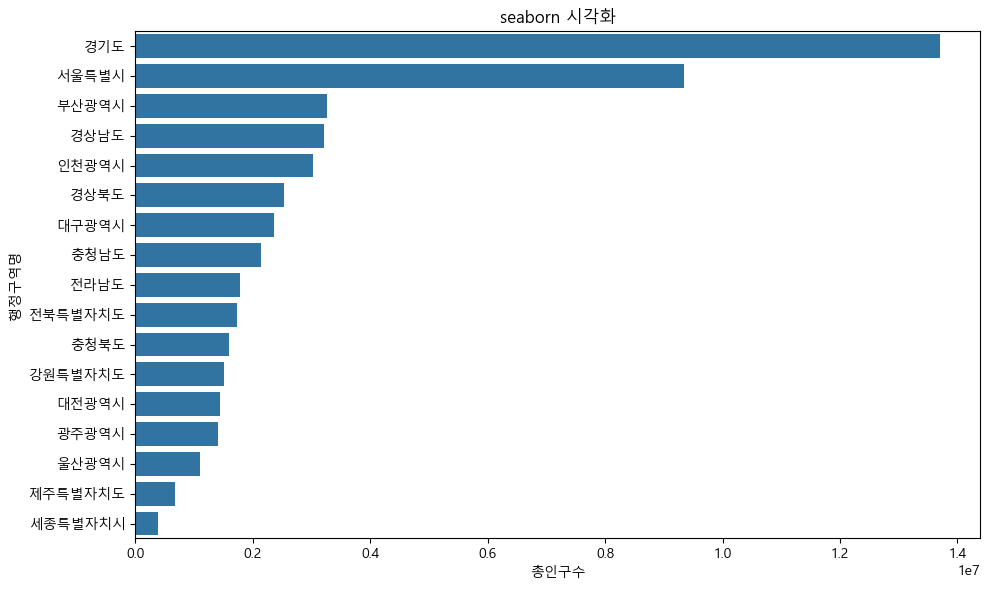

In [90]:
# ------------------------
# seaborn으로 시각화
# ------------------------

plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_region1_sorted,
    x='총인구수',
    y='행정구역명'
)
plt.title('seaborn 시각화')
plt.xlabel('총인구수')
plt.ylabel('행정구역명')
plt.tight_layout()
plt.show()

### 행정구역별 남녀 인구수 시각화
* melt 후 seaborn 시각화

In [91]:
# -----------------------
# melt
#   df_region1_melt
# -----------------------

df_region1_melt = df_region1.melt(
    id_vars='행정구역명',
    value_vars=['남자 인구수', '여자 인구수'],
    var_name='성별',
    value_name='인구수'
)

In [92]:
df_region1_melt = df_region1_melt.sort_values(by='인구수', ascending=False)

df_region1_melt

,행정구역명,성별,인구수
8,경기도,남자 인구수,6883349
25,경기도,여자 인구수,6816032
17,서울특별시,여자 인구수,4831116
0,서울특별시,남자 인구수,4504618
18,부산광역시,여자 인구수,1673622
15,경상남도,남자 인구수,1623318
32,경상남도,여자 인구수,1596256
1,부산광역시,남자 인구수,1585597
20,인천광역시,여자 인구수,1516718
3,인천광역시,남자 인구수,1514643


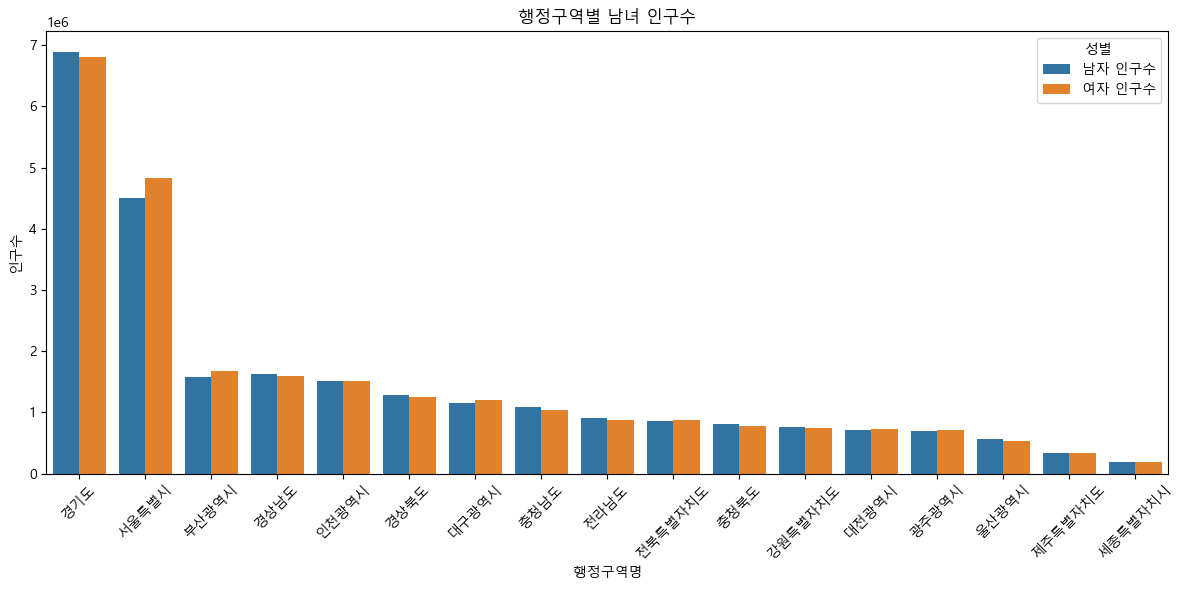

In [93]:
# -----------------------
# 남녀 인구수 막대그래프
# -----------------------

plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_region1_melt,
    x='행정구역명',
    y='인구수',
    hue='성별'
)
plt.title('행정구역별 남녀 인구수')
plt.xticks(rotation=45)  # x축 글자 기울이기
plt.tight_layout()
plt.show()

## 시군구별 인구수 시각화

#### 데이터 준비

In [94]:
# ----------------------------------
# 분석할 행정구역 입력받기
#   - 변수명 : region_select
# ----------------------------------

region_select = '부산광역시'

In [95]:
# ----------------------
# 입력받은 행정구역의 시군구 데이터 선택
#   - 변수명 : df_region2
#   - 선택조건1. 행정구역명
#   - 선택조건2. 시군구 행정구역코드는 '000000'(6자리) 로 끝남
#   - 선택조건3. 시군구 행정구역코드는 '000000'(8자리) 로 끝나지 않음
# ----------------------

df_region2 = df[
    (df['행정구역명'] == region_select) & 
    (df['행정구역코드'].str.endswith('00000')) & 
    (~df['행정구역코드'].str.endswith('00000000'))
]

df_region2.head()

,행정구역,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,행정구역명,행정구역코드
453,부산광역시 중구 (2611000000),37295,23526,1.59,18087,19208,0.94,부산광역시,2611000000
463,부산광역시 서구 (2614000000),102891,53679,1.92,49334,53557,0.92,부산광역시,2614000000
477,부산광역시 동구 (2617000000),85559,47000,1.82,41529,44030,0.94,부산광역시,2617000000
490,부산광역시 영도구 (2620000000),103032,53547,1.92,50529,52503,0.96,부산광역시,2620000000
502,부산광역시 부산진구 (2623000000),362533,186462,1.94,173556,188977,0.92,부산광역시,2623000000


In [96]:
# ----------------------
# 시군구명 칼럼 생성
# ----------------------

df_region2 = df_region2.copy()
df_region2['시군구명'] = df_region2['행정구역'].str.split().str[1]

df_region2.head()

,행정구역,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,행정구역명,행정구역코드,시군구명
453,부산광역시 중구 (2611000000),37295,23526,1.59,18087,19208,0.94,부산광역시,2611000000,중구
463,부산광역시 서구 (2614000000),102891,53679,1.92,49334,53557,0.92,부산광역시,2614000000,서구
477,부산광역시 동구 (2617000000),85559,47000,1.82,41529,44030,0.94,부산광역시,2617000000,동구
490,부산광역시 영도구 (2620000000),103032,53547,1.92,50529,52503,0.96,부산광역시,2620000000,영도구
502,부산광역시 부산진구 (2623000000),362533,186462,1.94,173556,188977,0.92,부산광역시,2623000000,부산진구


In [97]:
# -------------------
# 총인구수 내림차순 정렬
# --------------------

df_region2_sorted = df_region2.sort_values(by='총인구수', ascending=False)
df_region2_sorted.head()

,행정구역,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,행정구역명,행정구역코드,시군구명
569,부산광역시 해운대구 (2635000000),375227,169847,2.21,179704,195523,0.92,부산광역시,2635000000,해운대구
502,부산광역시 부산진구 (2623000000),362533,186462,1.94,173556,188977,0.92,부산광역시,2623000000,부산진구
588,부산광역시 사하구 (2638000000),291246,140774,2.07,144450,146796,0.98,부산광역시,2638000000,사하구
523,부산광역시 동래구 (2626000000),274784,122741,2.24,132398,142386,0.93,부산광역시,2626000000,동래구
555,부산광역시 북구 (2632000000),266015,122255,2.18,130466,135549,0.96,부산광역시,2632000000,북구


In [98]:
# -------------------
# seaborn 시각화를 위한 melt
#   df_region2_melt
# --------------------

df_region2_melt = pd.melt(
    df_region2_sorted,
    id_vars=['시군구명'],
    value_vars=['남자 인구수', '여자 인구수'],
    var_name='성별',
    value_name='인구수'
)

#### 시각화

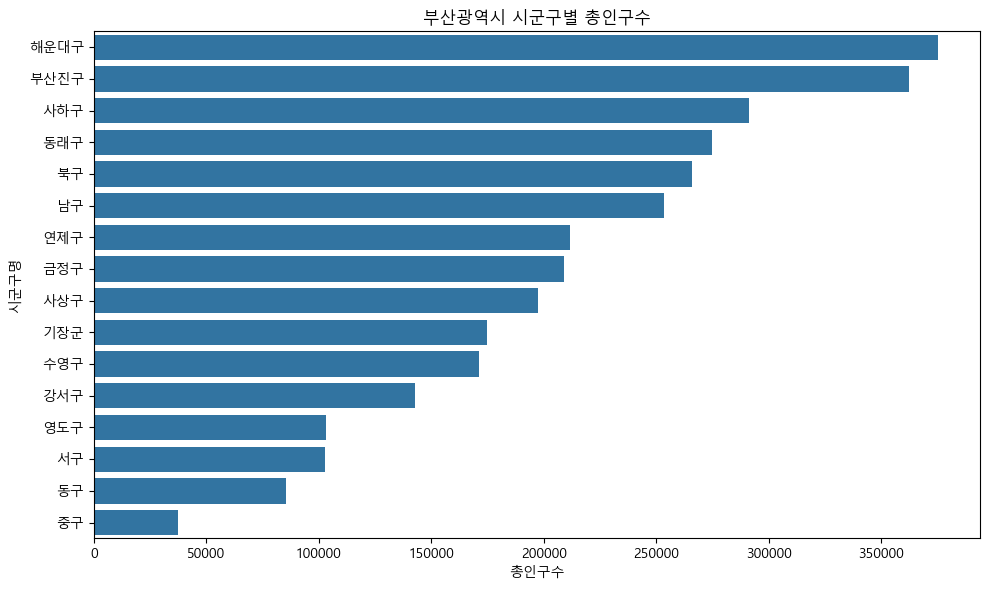

In [101]:
# -------------------
# 총인구수
# --------------------

plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_region2_sorted,
    x='총인구수',
    y='시군구명'
)
plt.title('부산광역시 시군구별 총인구수')
plt.xlabel('총인구수')
plt.ylabel('시군구명')
plt.tight_layout()
plt.show()

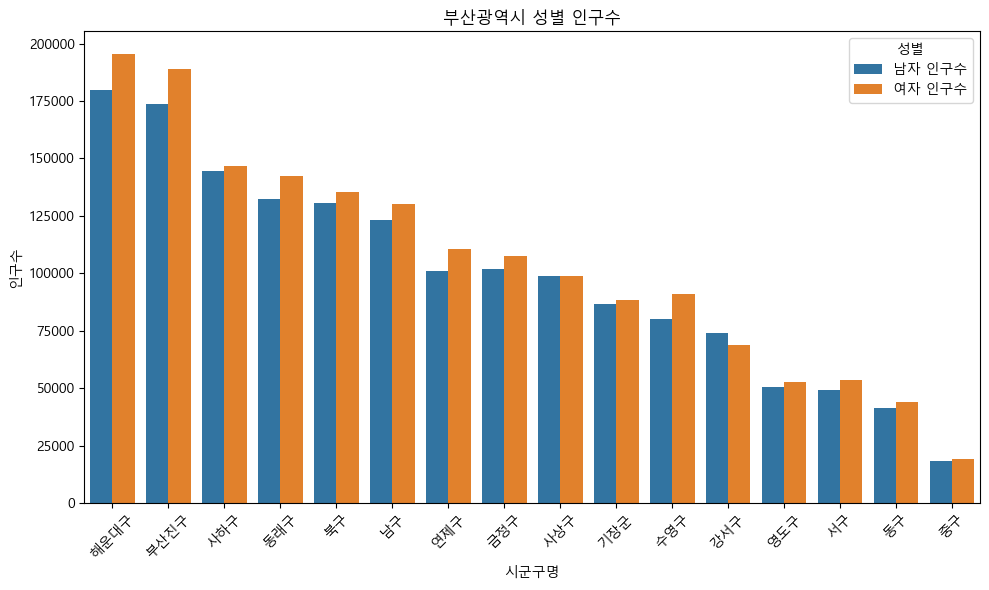

In [100]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_region2_melt, x='시군구명', y='인구수', hue='성별')
plt.title(f"{region_select} 성별 인구수")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 읍면동 인구수 시각화

#### 데이터 준비

In [119]:
# --------------------------------------------------------
# 행정구역의 읍면동 데이터 선택
#   - 변수명 : df_region3
# --------------------------------------------------------

df_region3 = df_region2 = df[
    (df['행정구역명'] == region_select) & 
    (df['행정구역코드'].str.endswith('00')) &
    (~df['행정구역코드'].str.endswith('00000')) & 
    (~df['행정구역코드'].str.endswith('00000000'))
]
df_region3

,행정구역,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,행정구역명,행정구역코드
454,부산광역시 중구 중앙동(2611051000),3106,2494,1.25,1432,1674,0.86,부산광역시,2611051000
455,부산광역시 중구 동광동(2611052000),2323,1548,1.50,1180,1143,1.03,부산광역시,2611052000
456,부산광역시 중구 대청동(2611053000),5617,3412,1.65,2671,2946,0.91,부산광역시,2611053000
457,부산광역시 중구 보수동(2611054500),9976,6097,1.64,4745,5231,0.91,부산광역시,2611054500
458,부산광역시 중구 부평동(2611056000),4060,2596,1.56,1918,2142,0.90,부산광역시,2611056000
...,...,...,...,...,...,...,...,...,...
670,부산광역시 기장군 기장읍(2671025000),51048,25891,1.97,24935,26113,0.95,부산광역시,2671025000
671,부산광역시 기장군 장안읍(2671025300),8546,4910,1.74,4626,3920,1.18,부산광역시,2671025300
672,부산광역시 기장군 정관읍(2671025600),77967,31520,2.47,38597,39370,0.98,부산광역시,2671025600
673,부산광역시 기장군 일광읍(2671025900),30059,13093,2.30,14851,15208,0.98,부산광역시,2671025900


In [120]:
# --------------------------------------------------------
# '시군구' 칼럼 추가
# '읍면동' 컬럼 추가
# '시군구 읍면동' 칼럼 추가
# --------------------------------------------------------

# 괄호 및 내부 숫자 제거
df_region3 = df_region3.copy()  # 슬라이스 경고 방지

df_region3['행정구역'] = df_region3['행정구역'].str.split('(').str[0].str.strip()

# 시군구 컬럼 추가
df_region3['시군구'] = df_region3['행정구역'].str.split().str[1]

# 읍면동 컬럼 추가
df_region3['읍면동'] = df_region3['행정구역'].str.split().str[2]

# 리스트로 남은 경우 문자로 합치기
df_region3['읍면동'] = df_region3['읍면동'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# 시군구 읍면동 컬럼 생성
df_region3['시군구 읍면동'] = df_region3['시군구'] + ' ' + df_region3['읍면동']

In [121]:
# --------------------------------------------------------
# 읍면동별 총인구수 내림차순 정렬
# --------------------------------------------------------

df_region3_sorted = df_region3.sort_values(by='총인구수', ascending=False)

### 시각화

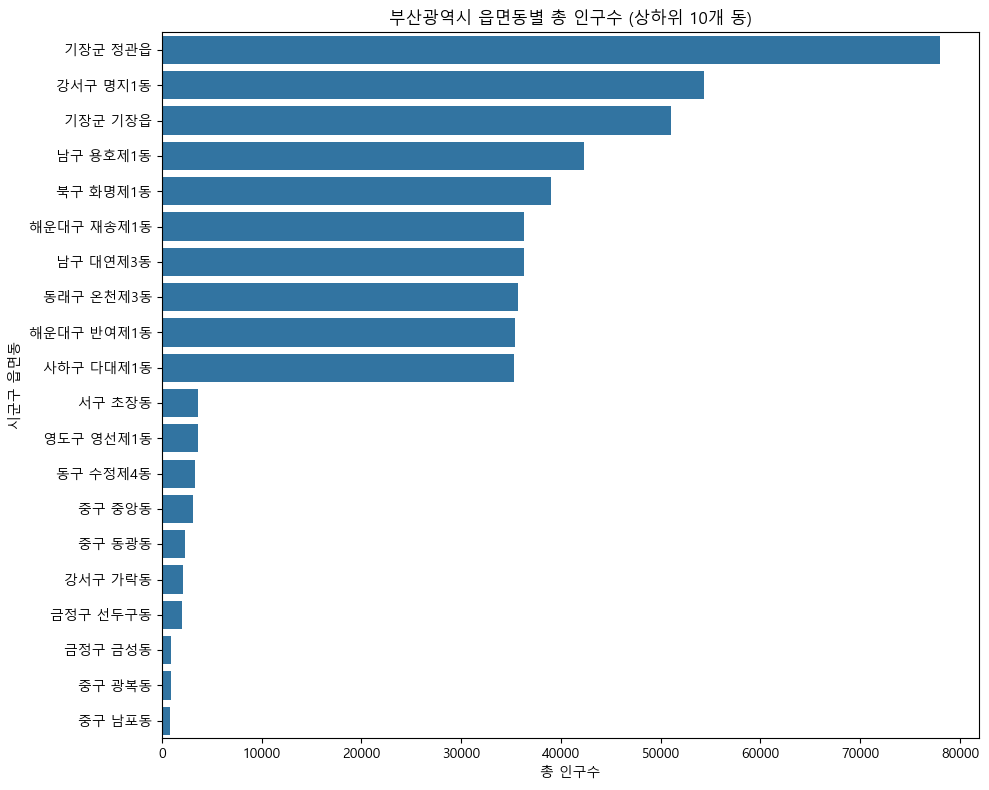

In [122]:
# --------------------------------------------------------
# 총 인구수 많은 10개 동과 적은 10개 동을 concat하여 시각화
# ---------------------------------------------------------

# 상위 10개 동
top10 = df_region3_sorted.head(10)

# 하위 10개 동
bottom10 = df_region3_sorted.tail(10)

# concat하여 하나의 데이터프레임으로 합치기
df_concat = pd.concat([top10, bottom10])

# 시각화
plt.figure(figsize=(10, 8))
sns.barplot(data=df_concat, y='시군구 읍면동', x='총인구수')
plt.title('부산광역시 읍면동별 총 인구수 (상하위 10개 동)')
plt.xlabel('총 인구수')
plt.ylabel('시군구 읍면동')
plt.tight_layout()
plt.show()